In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
token_api = '123ABC'
service = QiskitRuntimeService(channel="ibm_quantum", token=token_api)

# One qubit circuit

Create a circuit with one qubit.

In [16]:
from qiskit import QuantumCircuit

In [17]:
qc = QuantumCircuit(1)

Apply the Hadamard gate and visualize the circuit.

In [18]:
qc.h(0)
qc.draw('latex', initial_state=True)

It is possible to costumize the circuit display. See more options in __[Visualizing a Quantum Circuit](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html)__.


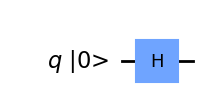

In [19]:
qc.draw('mpl', initial_state=True)

Execute the quantum circuit using the _statevector_simulator_ backend.

In [20]:
from qiskit import Aer
from qiskit import execute

In [21]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
h_state_vector = result.get_statevector(qc)

Visualize the output state on the Bloch sphere.

In [22]:
from qiskit.visualization import plot_bloch_multivector

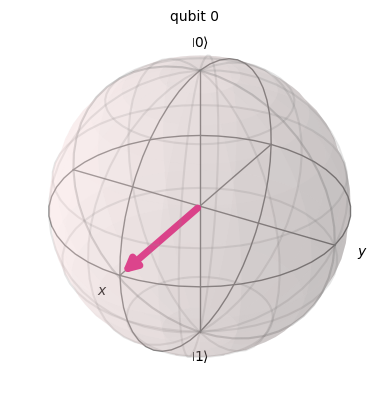

In [23]:
plot_bloch_multivector(h_state_vector)

Add the $X$ ($NOT$) operation.

In [24]:
qc.x(0)
qc.draw('latex', initial_state=True)

Visualize the new state.

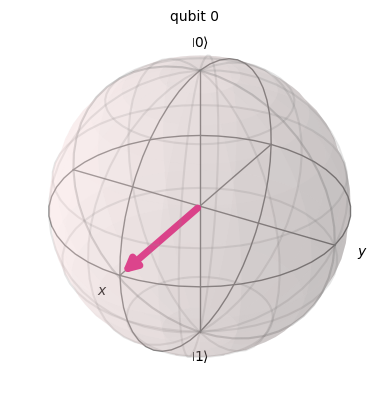

In [25]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
xh_state_vector = result.get_statevector(qc)
plot_bloch_multivector(xh_state_vector)

Note that the state did not changed after applying the $X$ gate. 

## Quantum Coin Game

For a better understanding of the above result, let's play a __[Quantum Coin Game](https://www.youtube.com/watch?v=QuR969uMICM)__.  Suppose a human and a quantum computer play a coin game with the following rules:

   1. The coin starts in state 0 (heads).
   2. The quantum computer plays first and can decide to apply, or not, a quantum operation.
   3. The human plays second and decides to apply, or not, a flip operation, i.e., a $X$ gate.
   4. Both players do not know the state of the coin, neither each one decisions to play or not.
   4. The quantum computer plays the final round.
   5. If the final state of the coin is $1$ (tails), the human wins; otherwise, the quantum computer wins.
   
Suppose the game has $7$ rounds, this means that the human has $3$ rounds and the quantum computer $4$ rounds, and the following strategies:

   - The quantum computer's strategy is to apply the $H$ gate on the first and last round, and will not play intermidiate rounds. 
  
   - The human strategy is to flip in every round. 
     
We now show the steps to code this game.

In [26]:
from qiskit import QuantumRegister, ClassicalRegister

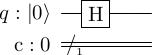

In [27]:
# Round 1
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
game_round1 = QuantumCircuit(q, c)
# Rule number 2 (by default the state initiates at 0)
game_round1.h(0)
game_round1.draw('latex', initial_state=True)

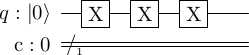

In [28]:
# The human's strategy 
human_strategy = QuantumCircuit(1, 1)
# Fisrt flip
human_strategy.x(0)
# Second flip
human_strategy.x(0)
# Third flip
human_strategy.x(0)
human_strategy.draw('latex', initial_state=True)

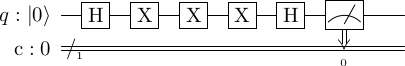

In [29]:
# Final round
quantum_coin_game = game_round1.compose(human_strategy)
# Rule number 5 and quantum computer strategy
quantum_coin_game.h(0)
# Add the measurement operator
quantum_coin_game.measure([0], [0])
quantum_coin_game.draw('latex', initial_state=True)

Let's simulate this _quantum_coin_game_ $1024$ times, using the _qasm_simulator_ backend.

In [30]:
simulator = Aer.get_backend('qasm_simulator')

In [31]:
result = execute(quantum_coin_game, simulator, shots=1024).result()

In [32]:
games_results = result.get_counts(quantum_coin_game)
games_results

{'0': 1024}

In [33]:
from qiskit.visualization import plot_histogram

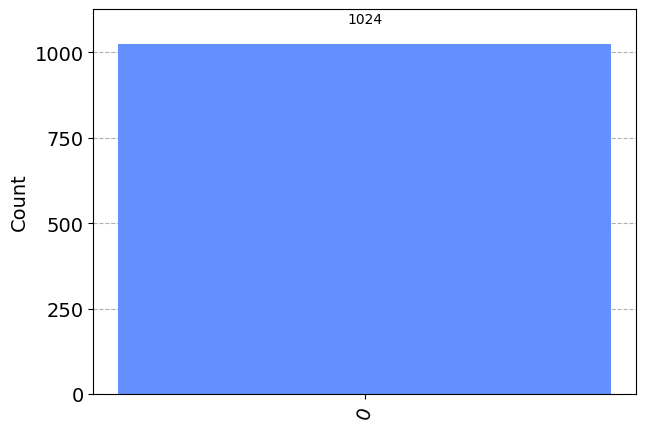

In [34]:
plot_histogram(games_results)

As can be seen in the above histogram, the quantum computer won all the $1024$ games (simulations). This append due to this particular game rules. The quantum computer first move puts the coin in a balanced superposition of $0$ (heads) and $1$ (tails), then the human can only flip or not the coin, a classical operation. However, the flip operation as no impact on the superposition, and this is proven as follows  

\begin{equation*}
	XH|0\rangle = \begin{pmatrix}
			0 & 1\\
			1 & 0
	\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} \begin{pmatrix}
		1 \\
		0
	\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
		1 \\
		1
	\end{pmatrix} =  \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \,.
\end{equation*}

Then, the last round is the application of the $H$ gate, which recovers the initial state of the coin, $0$ (heads). This is proven as follows   
\begin{equation*}
	HH|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} \begin{pmatrix}
		1 \\
		0
	\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix}
		1 \\
		1
	\end{pmatrix} = |0\rangle\,,
\end{equation*}

and it is the reason why the quantum computer always wins. 

Now, suppose that the human can apply quantum operations, but has no previous knowledge about it's effect and they are randomly selected.

Code to generate the new game.

In [35]:
from qiskit.circuit.random import random_circuit

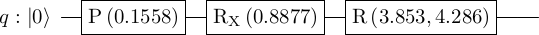

In [36]:
quantum_human_strategy = random_circuit(1, 3, measure=False)
quantum_human_strategy.draw('latex', initial_state=True)

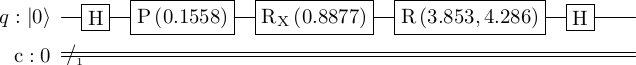

In [37]:
new_quantum_coin_game = game_round1.compose(quantum_human_strategy)
new_quantum_coin_game.h(0)
new_quantum_coin_game.draw('latex', initial_state=True)

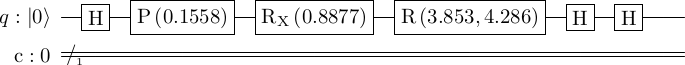

In [38]:
new_quantum_coin_game.h(0)
new_quantum_coin_game.draw('latex', initial_state=True)

In [39]:
new_quantum_coin_game.measure([0], [0])
result = execute(new_quantum_coin_game, simulator,shots=1024).result()

{'1': 847, '0': 177}


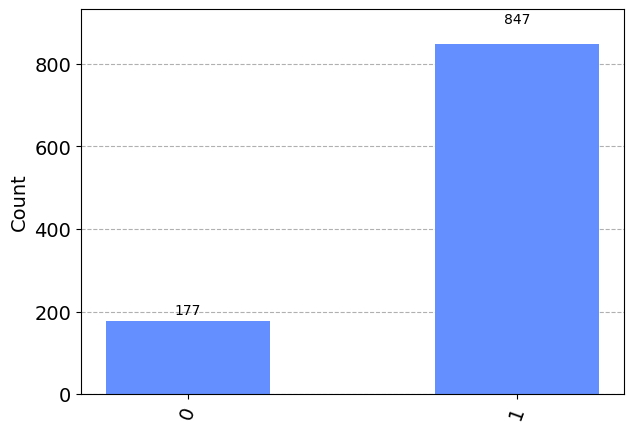

In [40]:
final_round = result.get_counts(new_quantum_coin_game)
print(final_round)
plot_histogram(final_round)

With this new strategy, the human (randomly) won most of the times. Instead of running the same game several times, let's play for different random strategies.

Game number 1: the human loses


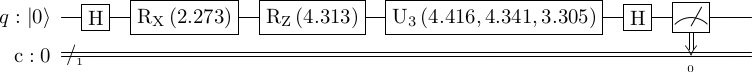


Game number 2: the human loses


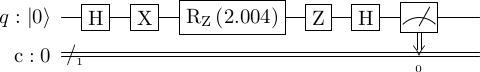


Game number 3: the human loses


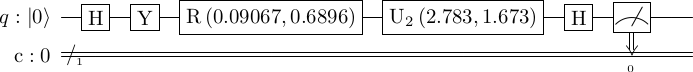


Game number 4: the human wins


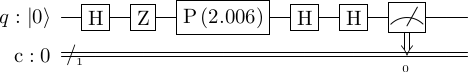


Game number 5: the human wins


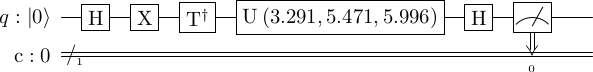


Game number 6: the human wins


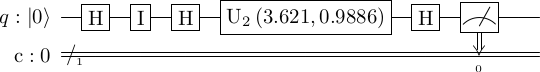


Game number 7: the human wins


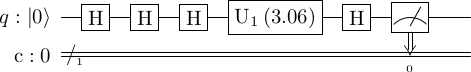


 o Quantum Computer winning percentage: 43% 
 o Human winning percentage: 57%


In [41]:
nb_games = 7
wins_count = 0
loses_count = 0
for t in range(0, nb_games):
    q = QuantumRegister(1, 'q')
    c = ClassicalRegister(1, 'c')
    game_round1 = QuantumCircuit(q, c)
    game_round1.h(0)
    human_rounds = random_circuit(1, 3, measure=False)
    final_game = game_round1.compose(human_rounds)
    final_game.h(0)
    final_game.measure([0], [0])
    res = execute(final_game, simulator, shots=1).result()
    final = res.get_counts(final_game)
    if '0' in final:
        loses_count += 1
        game_result = 'loses' 
        
    if '1' in final:
        wins_count += 1
        game_result = 'wins'
        
    print(f"Game number {t + 1}: the human {game_result}")
    display(final_game.draw('latex', initial_state=True))
    print()
        
print(" o Quantum Computer winning percentage: " 
      f"{round(100 * loses_count /nb_games)}% \n"
      f" o Human winning percentage: {round(100 * wins_count /nb_games)}%")

Playing with the above different random strategies (once), the quantum computer won more than half games. A natural question is the following:

 - Can the human always win this particular game?
    
Yes, the human can always beat the quantum computer with the following strategy:

 - playing only once and applying the $Z$ gate,
 
which implies the following:
   
  - the human has knowledge of quantum gates effects, guesses the coint first state and the quantum computer strategy, and the gate is no longer randomly selected.

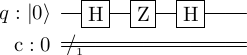

In [42]:
quantum_human_strategy = QuantumCircuit(1, 1)
quantum_human_strategy.z(0)
beat_the_game = game_round1.compose(quantum_human_strategy)
beat_the_game.h(0)
beat_the_game.draw('latex', initial_state=True)

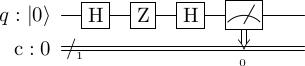

In [43]:
beat_the_game.measure([0], [0])
beat_the_game.draw('latex', initial_state=True)

{'1': 1024}


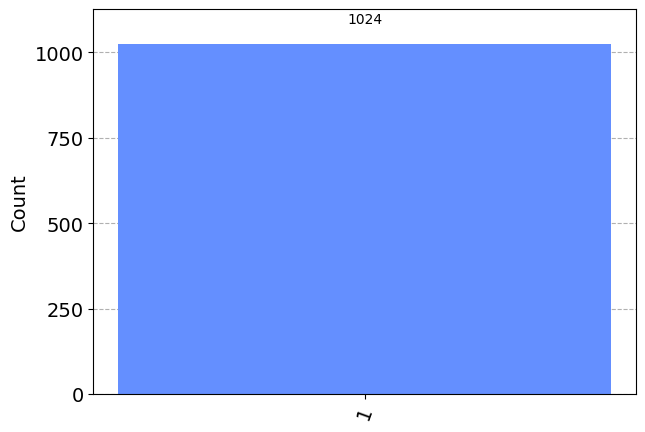

In [44]:
result = execute(beat_the_game, simulator, shots=1024).result()
final_round = result.get_counts(beat_the_game)
print(final_round)
plot_histogram(final_round)

This strategy works due to the following equality 

\begin{equation*}
	HZH = \frac{1}{\sqrt{2}}\begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} \begin{pmatrix}
			1 & 0\\
			0 & -1
	\end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix}
			1 & 1\\
			1 & -1
	\end{pmatrix} = \begin{pmatrix}
			0 & 1\\
			1 & 0
	\end{pmatrix} = X \,,
\end{equation*}

which always flips ($X$ gate) the coin to state $1$.

# Bell states circuit

The following code block implements the Bell circuit with initial state $|00\rangle\,.$

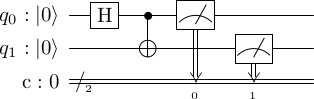

In [45]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
bell_circuit = QuantumCircuit(q, c)
bell_circuit.h(0)
bell_circuit.cnot(0, 1)
bell_circuit.measure([0, 1], [0, 1])
bell_circuit.draw('latex', initial_state=True)

## Run on a quantum simulator

Execute the Bell circuit using _qasm_simulator_ backend.

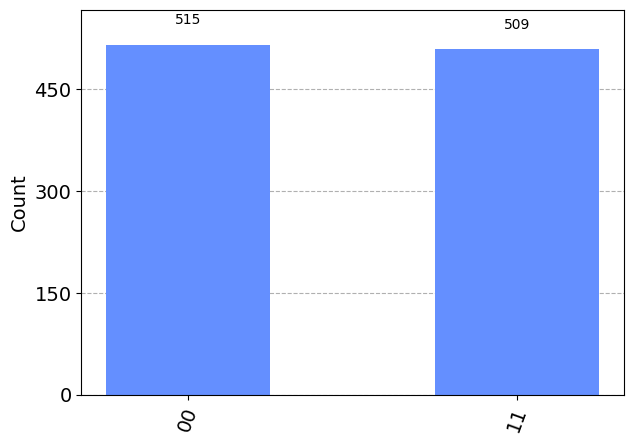

In [46]:
backend_sim = Aer.get_backend('qasm_simulator')
result = execute(bell_circuit, backend, shots=1024).result()
counts = result.get_counts(bell_circuit)
plot_histogram(counts)

As expected, the output is $|00\rangle$ or $|11\rangle$ with equal probability $0.5$ (approximated to one decimal place).

## Run on a real quantum processor

See the names of available backends and simulators.

In [47]:
backend = service.backend("ibm_perth")
sampler = Sampler(session=backend)

In [48]:
siba = []
for s in service.backends():
    siba.append(f"{s.name}")
    print(s.name)

ibmq_manila
ibm_nairobi
ibmq_jakarta
ibmq_qasm_simulator
ibmq_lima
ibmq_belem
simulator_mps
ibm_lagos
ibm_perth
ibmq_quito
simulator_extended_stabilizer
simulator_statevector
simulator_stabilizer


See backends and simulators configuration, such as, number of quibts, and universal gate set. Here we decided to show only one quantum processor configurations.

In [49]:
qp_list = ['ibm_nairobi']
# Conversion factors from standard SI units
us = 1e6
ns = 1e9
GHz = 1e-9
for s in qp_list:
    backend = service.get_backend(f"{s}")
    config = backend.configuration()
    name = config.backend_name
    print(f"Backend name: {name} \n"
          f"Version: {config.backend_version}")

    nb_qubits = config.n_qubits
    print(f"Qubit(s): {nb_qubits}")
    props = backend.properties()
    sim = ['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps',
           'simulator_extended_stabilizer', 'simulator_stabilizer']
    if name not in sim:
        for qb in range(0, nb_qubits):
            print(f" Qubit {qb + 1} has: \n"
                  f"  T1 time of {round(props.t1(qb) * us, 4)}" 
                  " microseconds \n" \
                  f"  T2 time of {round(props.t2(qb) * us, 4)}"   
                  " microseconds \n"
                  f"  U2 gate error of {round(props.gate_error('sx', qb), 4)}" 
                  "\n"
                  "  U2 gate duration of"  
                  f" {round(props.gate_length('sx', qb) * ns, 4)} nanoseconds \n"
                  "  Resonant frequency of" 
                  f" {round(props.frequency(qb) * GHz, 4)} GHz")
    print()    
    print(f"Basis gate: {config.basis_gates}")
    print()
    print("------------------------------------------------------")
    print()

Backend name: ibm_nairobi 
Version: 1.3.3
Qubit(s): 7
 Qubit 1 has: 
  T1 time of 58.7295 microseconds 
  T2 time of 26.9935 microseconds 
  U2 gate error of 0.0003
  U2 gate duration of 35.5556 nanoseconds 
  Resonant frequency of 5.2605 GHz
 Qubit 2 has: 
  T1 time of 94.1382 microseconds 
  T2 time of 62.9593 microseconds 
  U2 gate error of 0.0003
  U2 gate duration of 35.5556 nanoseconds 
  Resonant frequency of 5.1704 GHz
 Qubit 3 has: 
  T1 time of 47.9886 microseconds 
  T2 time of 49.0344 microseconds 
  U2 gate error of 0.0005
  U2 gate duration of 35.5556 nanoseconds 
  Resonant frequency of 5.2743 GHz
 Qubit 4 has: 
  T1 time of 124.2984 microseconds 
  T2 time of 59.0956 microseconds 
  U2 gate error of 0.0007
  U2 gate duration of 35.5556 nanoseconds 
  Resonant frequency of 5.0267 GHz
 Qubit 5 has: 
  T1 time of 77.4553 microseconds 
  T2 time of 60.5888 microseconds 
  U2 gate error of 0.0003
  U2 gate duration of 35.5556 nanoseconds 
  Resonant frequency of 5.1772 GHz


To run the Bell circuit we need an active backend with at least $2$ quibts.

In [50]:
sim = ['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 
           'simulator_extended_stabilizer', 'simulator_stabilizer']
for s in siba:
    if f"{s}" not in sim:
        backend = service.get_backend(f"{s}")
        config = backend.configuration()

        print(f"Backend name: {s} \n"
              f"Qubit(s): {config.n_qubits} \n"
              f"Operational: {backend.status().operational} \n"
              f"Pending jobs: {backend.status().pending_jobs} \n"
              f"Status message: {backend.status().status_msg}")
        print("-------------------------------------------------")

Backend name: ibmq_manila 
Qubit(s): 5 
Operational: True 
Pending jobs: 367 
Status message: active
-------------------------------------------------
Backend name: ibm_nairobi 
Qubit(s): 7 
Operational: True 
Pending jobs: 43 
Status message: active
-------------------------------------------------
Backend name: ibmq_jakarta 
Qubit(s): 7 
Operational: True 
Pending jobs: 111 
Status message: active
-------------------------------------------------
Backend name: ibmq_lima 
Qubit(s): 5 
Operational: True 
Pending jobs: 114 
Status message: internal
-------------------------------------------------
Backend name: ibmq_belem 
Qubit(s): 5 
Operational: True 
Pending jobs: 49 
Status message: active
-------------------------------------------------
Backend name: ibm_lagos 
Qubit(s): 7 
Operational: True 
Pending jobs: 69 
Status message: active
-------------------------------------------------
Backend name: ibm_perth 
Qubit(s): 7 
Operational: True 
Pending jobs: 41 
Status message: active
-

Here we choose the one with less pending jobs. Let's see the transpiled circuit.

In [51]:
from qiskit import transpile

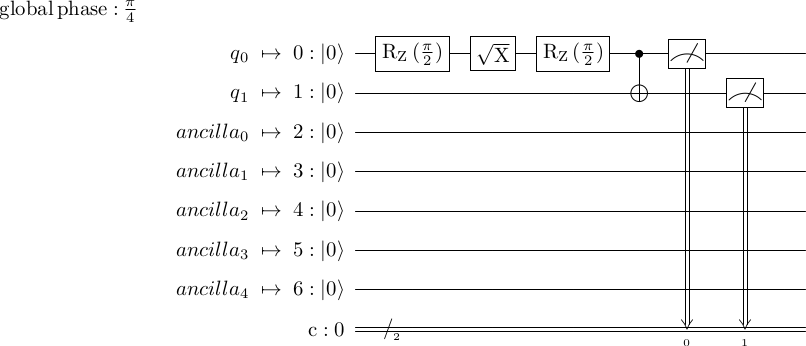

In [52]:
backend_qp = service.get_backend('ibm_nairobi')
transpiled_qc = transpile(bell_circuit, backend_qp)
transpiled_qc.draw('latex', initial_state=True)

Note that, after running the _execute()_ method, the circuit will enter into the backend queue to be physically executed. It can take a significant time to get the results. If you want to continue to explore the Qiskit functionalities, create a copy of the current Jupyter notebook or a new one.

In [53]:
sampler = Sampler(session=backend_qp)

In [96]:
job = sampler.run(bell_circuit, shots=1024)

In [103]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

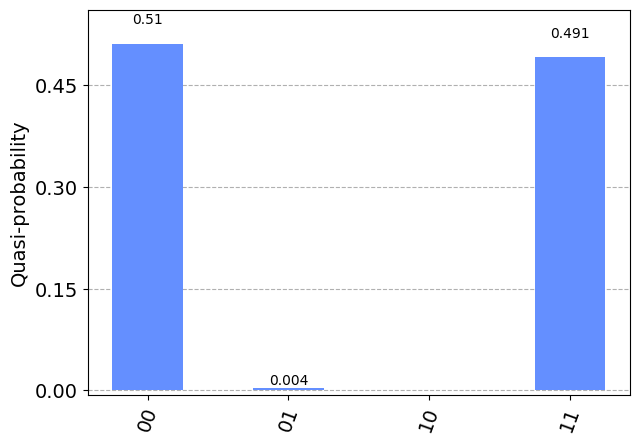

In [105]:
quasi_dist = job.result().quasi_dists
plot_histogram(quasi_dist[0].binary_probabilities())

Most of the times the circuit was measured at state $|00\rangle$ or $|11\rangle\,.$ It was also measured at state $|01\rangle$ a few times. Without applying efficient error-correction techniques, this example shows the existence of some noise in this particular quantum processor.

It is possible to retrieve past jobs.

In [116]:
past_job = service.job("1234")

In [120]:
past_job.backend().name

'ibm_nairobi'

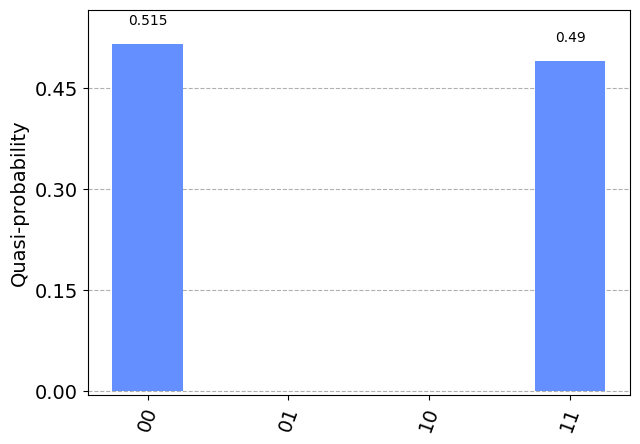

In [122]:
past_job.result().quasi_dists
plot_histogram(past_job.result().quasi_dists[0].binary_probabilities())